# Step 1 - Prepare network data
## Project: Growing Urban Bicycle Networks

This notebook loads the population density attribute and the bikecount attribute, created in 1b and 1c, and multiplies them together to a multiattribute, expressed as:
a*(edgelength*(1/bikecount)) + (1-a)*(edgelength*(1/populationdensity))
The value a (alpha) is used to apply a weight on each attribute.

Contact: Michael Szell (michael.szell@gmail.com)  
Created: 2020-06-09  
Last modified: 2021-03-10

## Preliminaries

### Parameters

In [98]:
debug = True # If True, will produce plots and/or verbose output to double-check
%run -i "../parameters/parameters.py"

Loaded parameters.



### Setup

In [99]:
%run -i path.py
#%run -i setup.py
%run -i setupCPH.py

%load_ext watermark
%watermark -n -v -m -g -iv
import statistics

Loaded PATH.

Setup finished.

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.8.2
IPython version      : 8.5.0

Compiler    : Clang 9.0.1 
OS          : Darwin
Release     : 18.7.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

Git hash: 622e89ad3e22ced847c13f6f0b356976fa1617ba

igraph    : 0.9.1
numpy     : 1.23.3
networkx  : 2.8.6
watermark : 2.3.1
sklearn   : 1.1.2
geojson   : 2.5.0
osmnx     : 0.16.2
pandas    : 1.4.4
fiona     : 1.8.21
geopandas : 0.11.1
csv       : 1.0
matplotlib: 3.6.0
sys       : 3.8.2 | packaged by conda-forge | (default, Apr 24 2020, 07:56:27) 
[Clang 9.0.1 ]
osgeo     : 3.2.1
pyproj    : 3.4.0
shapely   : 1.8.4



### Functions

In [100]:
%run -i functions.py

Loaded functions.



## Load carall graph

In [101]:
G_carall = ox.load_graphml('../../bikenwgrowth_external/data/copenhagen/bikedata/G_carall_graphml.graphml')

In [102]:
with open("../../bikenwgrowth_external/data/copenhagen/bikedata/mean_pop_den_attr.pkl", 'rb') as f:
    mean_pop_den_attr = pickle.load(f)
with open("../../bikenwgrowth_external/data/copenhagen/bikedata/mean_bcount_attr.pkl", 'rb') as q:
    mean_bcount_attr = pickle.load(q)

## Set alpha

In [103]:
a = 0.5

In [104]:
unassigned_bcount_pop_den_attr = (a* mean_bcount_attr) + ((1-a)* mean_pop_den_attr)

In [105]:
with open('../../bikenwgrowth_external/data/copenhagen/bikedata/unassigned_bcount_pop_den_attr.pkl', 'wb') as f:
    pickle.dump(unassigned_bcount_pop_den_attr, f)

## Add 'bcount_pop_den_attr' to carall graph

In [106]:
nx.set_edge_attributes(G_carall, 0.0, 'bcount_pop_den_attr')

ox_to_csv(G_carall, PATH["data"] + 'copenhagen' + "/", 'copenhagen', 'carall')

ox_to_csv(ox.simplify_graph(G_carall), PATH["data"] + 'copenhagen' + "/", 'copenhagen', 'carall', "_simplified")

ox.save_graphml(G_carall, "../../bikenwgrowth_external/data/copenhagen/bikedata/G_carall_graphml.graphml")

with zipfile.ZipFile("../../bikenwgrowth_external/data/copenhagen/copenhagen_carall_edges.zip", 'r') as zip_ref:
    zip_ref.extractall("../../bikenwgrowth_external/data/copenhagen/")

edges = pd.read_csv("../../bikenwgrowth_external/data/copenhagen/copenhagen_carall_edges.csv")

copenhagen: Successfully wrote graph carall
copenhagen: Successfully wrote graph carall_simplified


/var/folders/r8/tq2ln28d2vg5b08rjdywrcvc0000gn/T/ipykernel_74753/2971328665.py:12: DtypeWarning: Columns (13,14,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  edges = pd.read_csv("../../bikenwgrowth_external/data/copenhagen/copenhagen_carall_edges.csv")


In [107]:
edges

,osmid,oneway,name,highway,maxspeed,length,length_attr,bcount_attr,pop_den_attr,bcount_pop_den_attr,...,bridge,access,junction,width,tunnel,service,geometry,u,v,key
0,27226011,True,Banegårdspladsen,tertiary,30.0,15.342,0.121630,0.113953,0.100873,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (12.5629057 55.6739848, 12.5630034 ...",118725,2512504197,0
1,140412993,True,Vesterbrogade,tertiary,50.0,30.958,0.143677,0.102529,0.101762,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (12.5629057 55.6739848, 12.5633457 ...",118725,298795891,0
2,2371125,True,Vasbygade,primary,50.0,27.236,0.138422,0.113953,0.103234,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (12.5584685 55.6619841, 12.5581719 ...",118730,1051183834,0
3,10621262,True,Kalvebod Brygge,primary,50.0,20.355,0.128707,0.105479,0.102417,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (12.5586004 55.6618973, 12.5588388 ...",118731,1051183809,0
4,25996200,True,Dybbølsbro,tertiary,40.0,3.763,0.105282,0.113953,0.100446,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (12.5615093 55.6630978, 12.5615457 ...",118732,6534097568,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65747,167455999,False,Niels Juels Gade,primary,50.0,10.184,0.114347,0.113953,0.100644,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (12.5865446 55.6771245, 12.5865791 ...",10567765633,1788511956,0
65748,409319710,False,Otto Busses Vej,unclassified,50.0,6.811,0.109585,0.113953,0.100384,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (12.5565252 55.6612128, 12.5564425 ...",10567808395,10567808396,0
65749,409319710,False,Otto Busses Vej,unclassified,50.0,6.905,0.109718,0.113953,0.100389,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (12.5565252 55.6612128, 12.5565912 ...",10567808395,3953903117,0
65750,409319710,False,Otto Busses Vej,unclassified,50.0,20.526,0.128949,0.113953,0.101158,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (12.5564425 55.6611731, 12.5561643 ...",10567808396,3953903116,0


## Calculate 'bcount_pop_den_attr' for each edge, and add to carall graph

In [108]:
edges = edges.drop(edges.columns[[0,1,2,3,4,5,6,9,10,11,12,13,14,15,16,17,18,19,20,21]], axis=1)

edges['bcount_pop_den_attr'] = a* edges['bcount_attr'] + (1-a)*edges['pop_den_attr']
#edges['bcount_attr'] * edges['pop_den_attr']

In [109]:
edges

,bcount_attr,pop_den_attr,bcount_pop_den_attr
0,0.113953,0.100873,0.107413
1,0.102529,0.101762,0.102145
2,0.113953,0.103234,0.108594
3,0.105479,0.102417,0.103948
4,0.113953,0.100446,0.107200
...,...,...,...
65747,0.113953,0.100644,0.107298
65748,0.113953,0.100384,0.107168
65749,0.113953,0.100389,0.107171
65750,0.113953,0.101158,0.107556


In [110]:
i=-1
for e in G_carall.edges():
    i+=1
    a,b=e
    bcount_pop_den_attr = edges['bcount_pop_den_attr'].iloc[i]
    nx.set_edge_attributes(G_carall, {(a,b,0): {"bcount_pop_den_attr": bcount_pop_den_attr}})

normalise_graph_attr(G_carall, "bcount_pop_den_attr")

bcount_pop_den_attr_dict = nx.get_edge_attributes(G_carall, "bcount_pop_den_attr")

bcount_pop_den_attr_mean = statistics.mean([k for k in bcount_pop_den_attr_dict.values()])

with open('../../bikenwgrowth_external/data/copenhagen/bikedata/mean_bcount_pop_den_att.pkl', 'wb') as f:
    pickle.dump(bcount_pop_den_attr_mean, f)

ox_to_csv(G_carall, PATH["data"] + 'copenhagen' + "/", 'copenhagen', 'carall')

ox_to_csv(ox.simplify_graph(G_carall), PATH["data"] + 'copenhagen' + "/", 'copenhagen', 'carall', "_simplified")

ox.save_graphml(G_carall, "../../bikenwgrowth_external/data/copenhagen/bikedata/G_carall_graphml.graphml")

with open('../../bikenwgrowth_external/data/copenhagen/bikedata/edges_dict_bcount_pop_den_attr.pkl', 'wb') as f:
    pickle.dump(bcount_pop_den_attr_dict, f)

copenhagen: Successfully wrote graph carall
copenhagen: Successfully wrote graph carall_simplified


# Calculate edge betweenness for 'bcount_pop_den_attr'

In [58]:
btw_bcount_pop_den_attr = nx.edge_betweenness_centrality(G_carall,  weight='bcount_pop_den_attr')

In [ ]:
btw_bcount_pop_den_attr_norm = normalise_edge_dict(btw_bcount_pop_den_attr)

/Users/Kristof/opt/anaconda3/envs/OSMNX/lib/python3.8/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


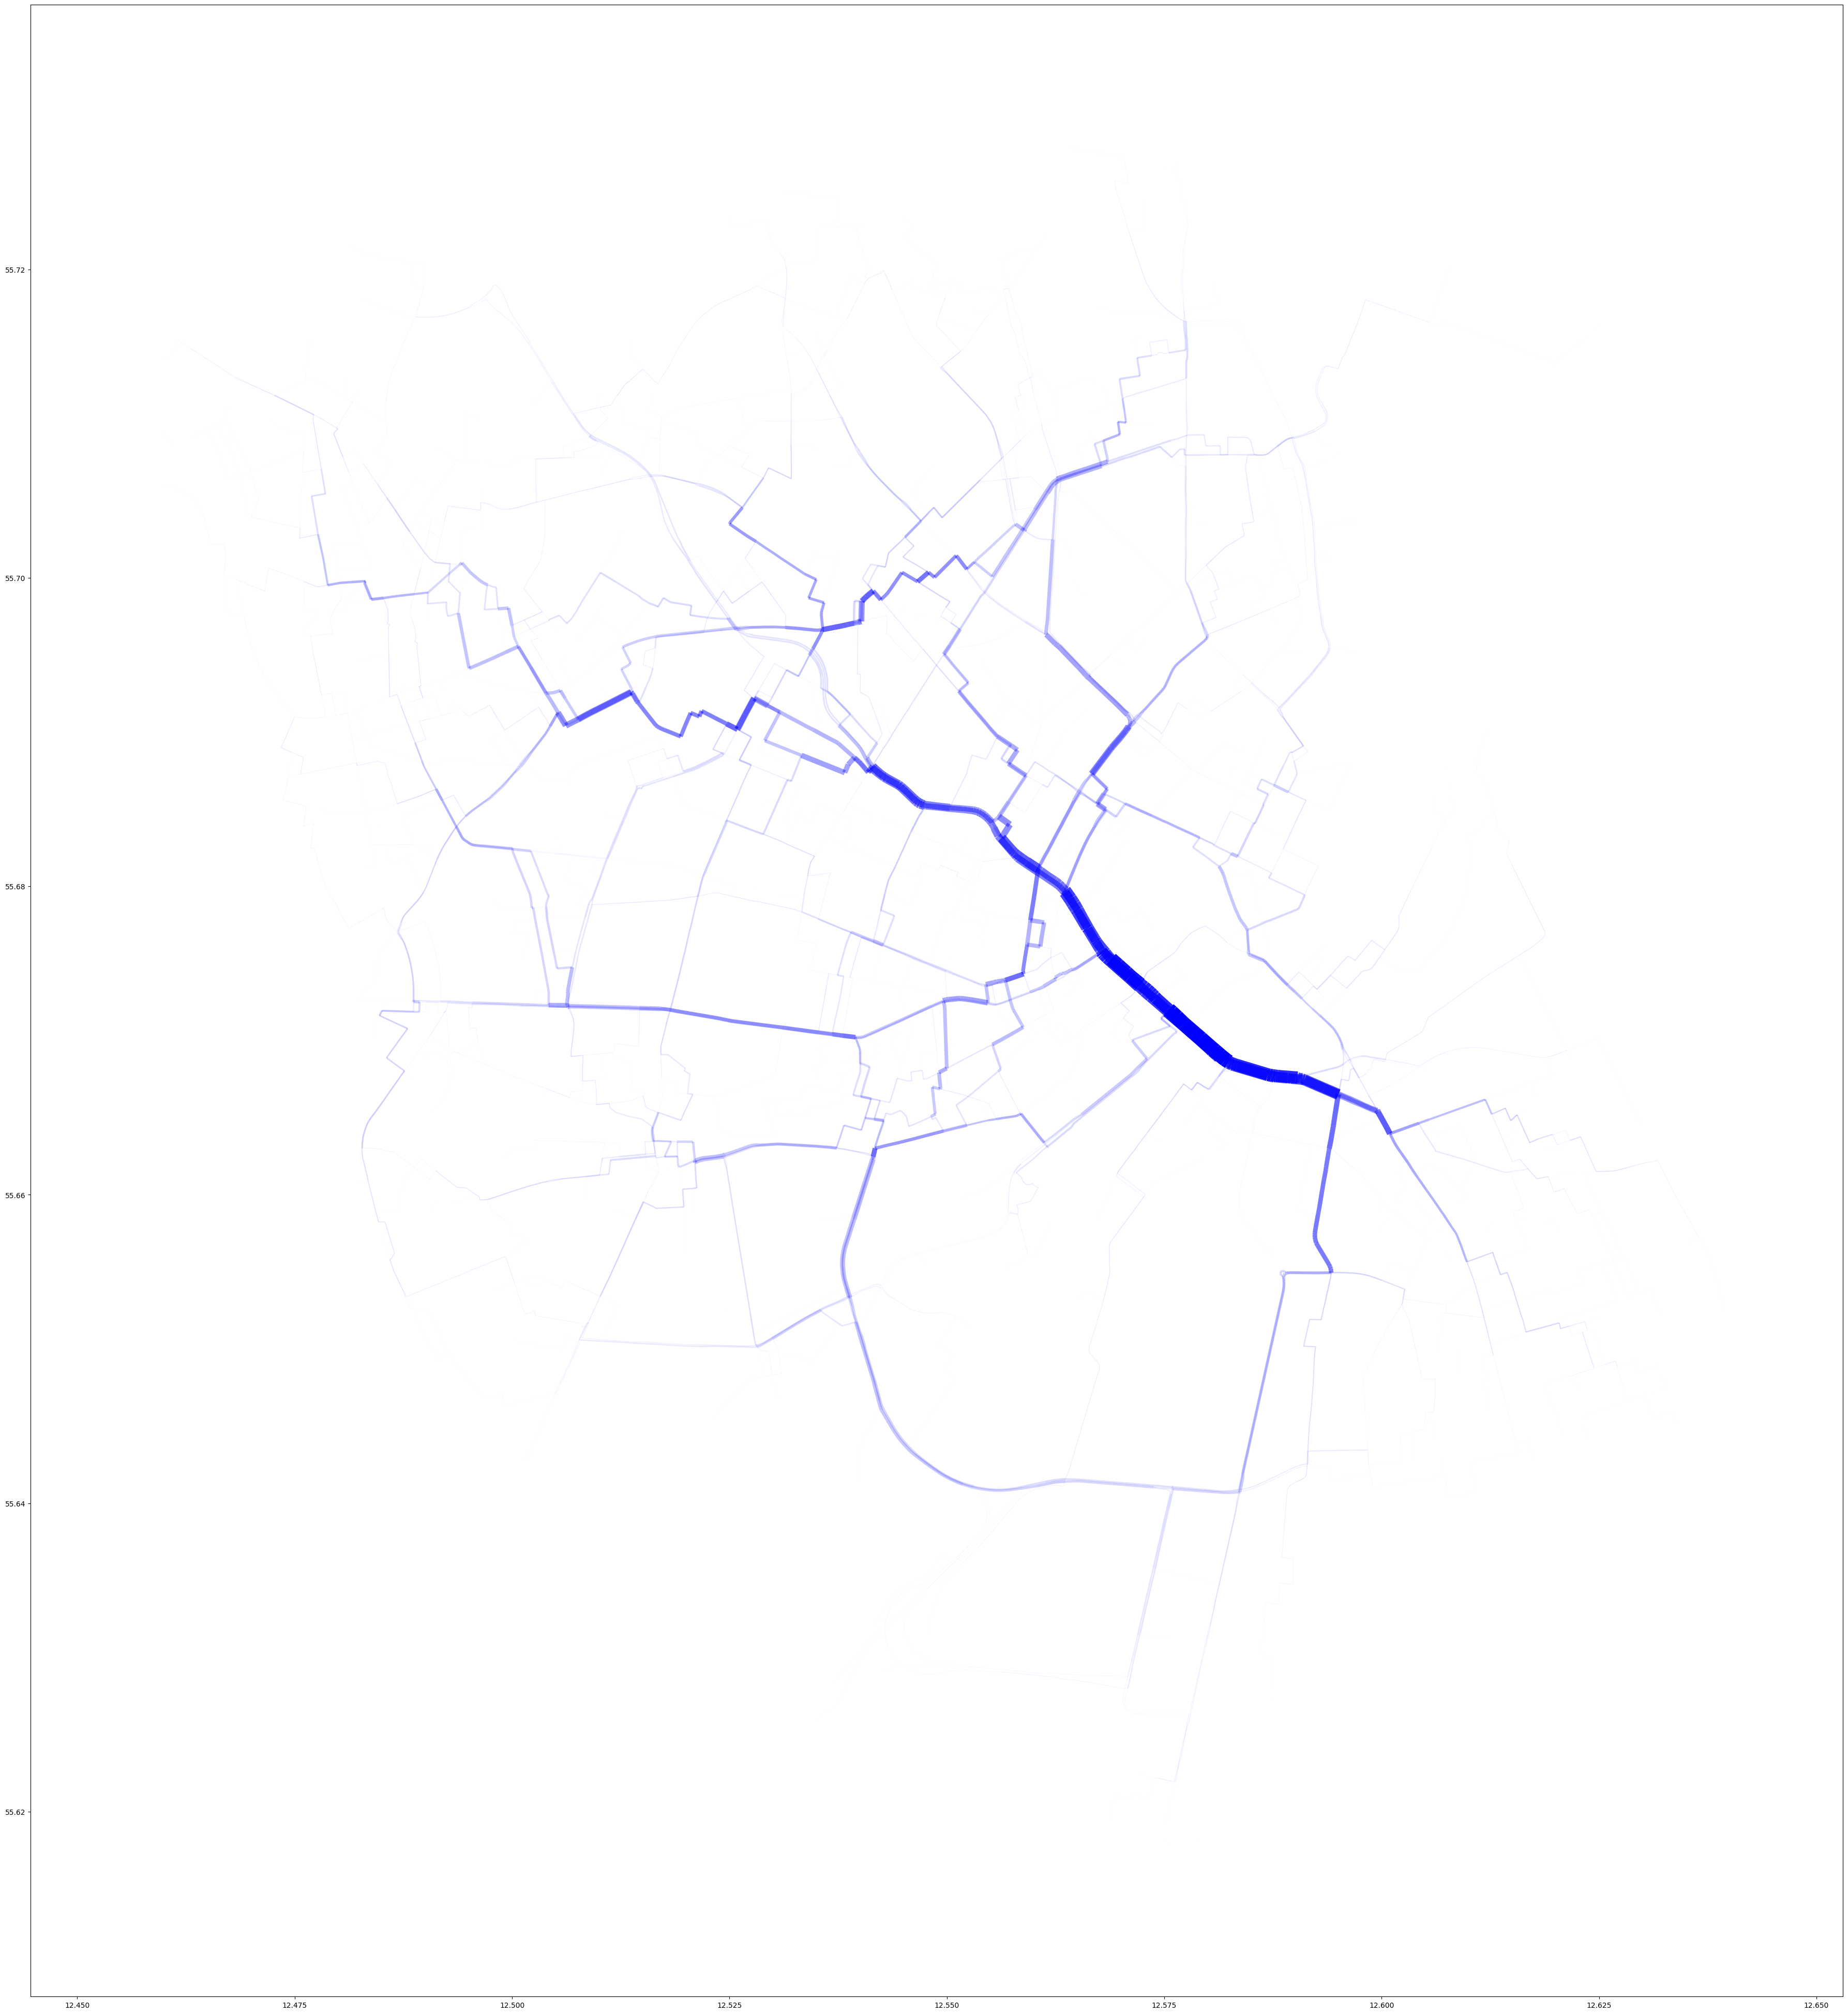

In [62]:
#This plot is edge betweenness centrality based on the 'bc_len_attr' attribute 
lanes = ox.graph_to_gdfs(G_carall, nodes=False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


ac = [btw_bcount_pop_den_norm[k] for k in btw_bcount_pop_den_norm]
#ac = [0.08 if (edges_dict[k]) == meancountfraction else 0.8 for k in edges_dict]
lc = [btw_bcount_pop_den_norm[k]*20 for k in btw_bcount_pop_den_norm]

ax = world[world.name == "Copenhagen municipality"].plot(color='black', edgecolor='black', figsize=(50,50),bgcolor = 'black')
#bikelanes.plot(ax=ax, color='red')
lanes.plot(ax=ax, color='blue', alpha= ac, linewidth = lc)


plt.show()

In [ ]:
btw_bcount_pop_den_attr = nx.edge_betweenness_centrality(G_carall,  weight='bcount_pop_den_attr')

In [ ]:
btw_bcount_pop_den_attr_norm = normalise_edge_dict(btw_bcount_pop_den_attr)

In [ ]:
#This plot is edge betweenness centrality based on the 'bc_len_attr' attribute 
lanes = ox.graph_to_gdfs(G_carall, nodes=False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


ac = [btw_bcount_pop_den_attr_norm[k] for k in btw_bcount_pop_den_attr_norm]
#ac = [0.08 if (edges_dict[k]) == meancountfraction else 0.8 for k in edges_dict]
lc = [btw_bcount_pop_den_attr_norm[k]*20 for k in btw_bcount_pop_den_attr_norm]

ax = world[world.name == "Copenhagen municipality"].plot(color='black', edgecolor='black', figsize=(50,50),bgcolor = 'black')
#bikelanes.plot(ax=ax, color='red')
lanes.plot(ax=ax, color='blue', alpha= ac, linewidth = lc)


plt.show()

In [ ]:
with open('../../bikenwgrowth_external/data/copenhagen/bikedata/btw_bcount_pop_den_attr.pickle', 'wb') as y:
    pickle.dump(btw_bcount_pop_den_attr_norm, y)

In [ ]:
Audio(sound_file, autoplay=True)